In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train)

11490434/11490434 [==============================] - 4s 0us/step
(60000, 28, 28)
(10000, 28, 28)
[5 0 4 ... 5 6 8]


In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
y_train[0]

5

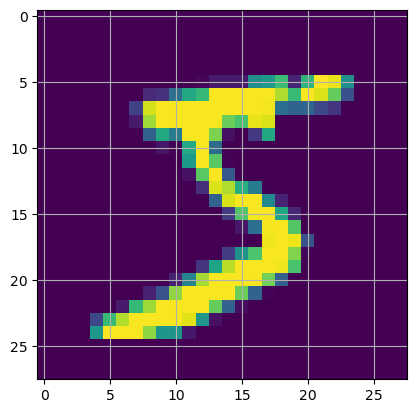

In [6]:
plt.imshow(x_train[0])
plt.grid(visible=True)

In [7]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [8]:
# One hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
#print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
#Build the CNN model
model=Sequential()
#add model layers
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [11]:
#Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
#train the model
hist=model.fit(x_train,y_train_one_hot,validation_data=(x_test,y_test_one_hot),epochs=5)

Epoch 1/5


1875/1875 [==============================] - 30s 15ms/step - loss: 0.2014 - accuracy: 0.9525 - val_loss: 0.0951 - val_accuracy: 0.9730
Epoch 2/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0728 - accuracy: 0.9776 - val_loss: 0.0760 - val_accuracy: 0.9771
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0486 - accuracy: 0.9851 - val_loss: 0.0732 - val_accuracy: 0.9785
Epoch 4/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0376 - accuracy: 0.9878 - val_loss: 0.0959 - val_accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0319 - accuracy: 0.9897 - val_loss: 0.0952 - val_accuracy: 0.9782


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 10)                184330    
                                                                 
Total params: 203434 (794.66 KB)
Trainable params: 203434 (794.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


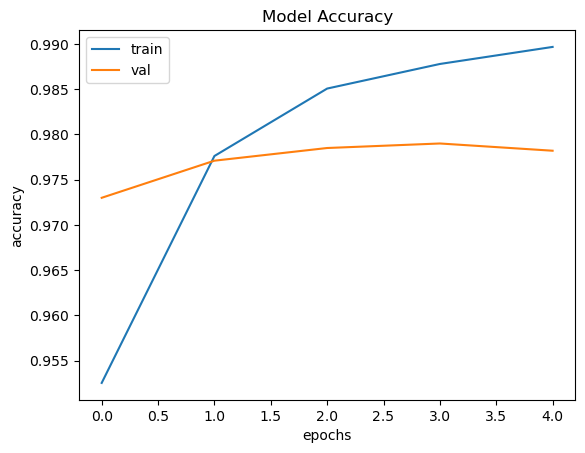

In [15]:
#visualize the model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','val'],loc='upper left')
plt.show()

In [16]:
#show predictions for first 4 images on the test dataset
predictions=model.predict(x_test[:4])
predictions

1/1 [==============================] - 0s 141ms/step


array([[8.6000147e-13, 4.9676013e-18, 1.3395385e-07, 4.8209963e-06,
        6.1974178e-17, 3.4643271e-15, 7.4609455e-20, 9.9999511e-01,
        2.9551436e-10, 3.3451401e-12],
       [1.8634784e-10, 9.3239791e-12, 1.0000000e+00, 1.4239161e-11,
        7.7482372e-17, 2.3960835e-17, 2.5103086e-09, 4.2256617e-18,
        1.3876254e-13, 3.2464957e-19],
       [3.1042550e-06, 9.8519391e-01, 5.1279421e-05, 5.6819669e-08,
        3.7657007e-04, 2.4944497e-05, 1.8469285e-04, 3.8649369e-04,
        1.3779025e-02, 3.4490160e-08],
       [9.9999988e-01, 1.1032327e-13, 6.4563629e-08, 1.0930997e-12,
        1.9277456e-11, 3.6255030e-10, 2.9939955e-08, 2.6608799e-15,
        3.0157785e-09, 1.4808496e-08]], dtype=float32)

In [17]:
#print the prediction as number label for first 4 images
print(np.argmax(predictions,axis=1))
#print actual labels
print(y_test[:4])

[7 2 1 0]
[7 2 1 0]


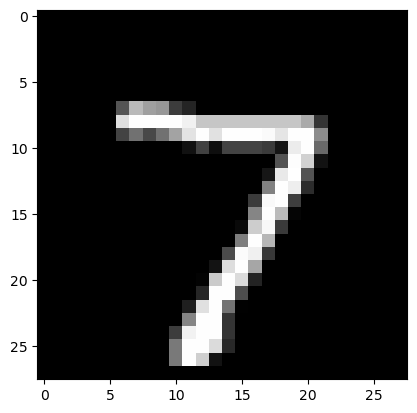

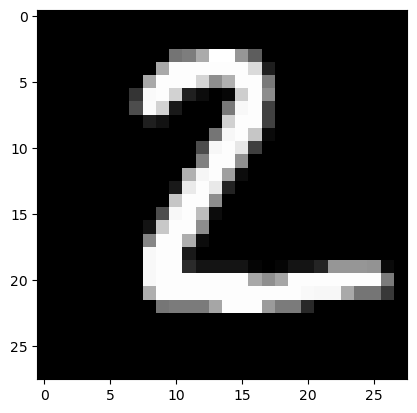

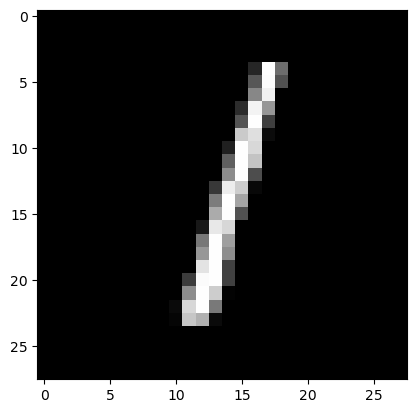

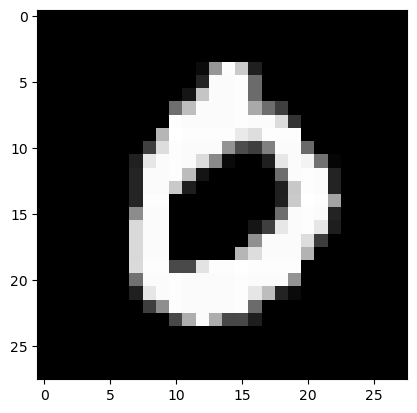

In [18]:
#show the first 4 images as pictures
for i in range(0,4):
  image=x_test[i]
  image=np.array(image,dtype='float')
  pixels=image.reshape((28,28))
  plt.imshow(pixels,cmap='gray')
  plt.show()